### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [32]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [33]:
X[1].min(), X[1].max()

(0, 10)

In [34]:
X[2].min(), X[2].max()

(450, 2000)

In [35]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [36]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [37]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

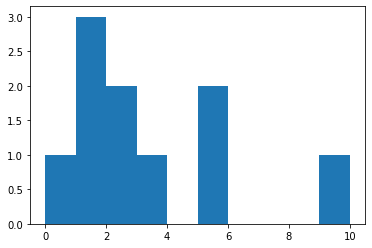

In [38]:
plt.hist(X[1])
plt.show()

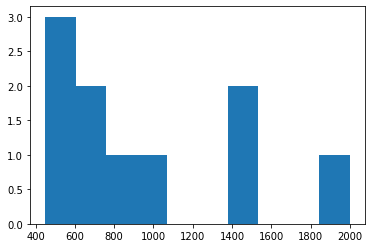

In [39]:
plt.hist(X[2])
plt.show()

In [40]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [41]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

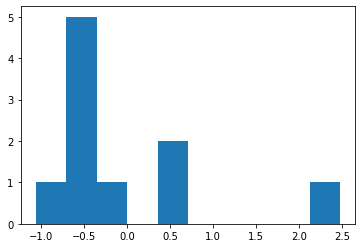

In [42]:
plt.hist(X_st[1])
plt.show()

In [43]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [44]:
X_st[2] = calc_std_fit(X[2])

In [45]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [46]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [47]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [48]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.94473361  5.13572063  3.03087164  4.15901061] 86.32200637688126
200 [55.49802393  5.49175538  2.38263866  4.54287323] 27.228292327193486
300 [56.36711838  5.71048289  1.85487927  4.87452659] 25.761444384247273
400 [56.4823773   5.85792198  1.43425702  5.16424219] 25.458733058441155
500 [56.49766289  5.96112109  1.09671564  5.41113665] 25.27159669845679
600 [56.49969005  6.03587123  0.82450782  5.61831692] 25.1481601308249
700 [56.49995889  6.09163208  0.60423802  5.79047023] 25.06635657988188
800 [56.49999455  6.1342319   0.42557809  5.9326066 ] 25.01206423763029
900 [56.49999928  6.16738265  0.28043529  6.04946622] 24.976007189549108
1000 [56.4999999   6.19353679  0.16239276  6.14527522] 24.952053501238506


array([56.4999999 ,  6.19353679,  0.16239276,  6.14527522])

In [49]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [50]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50796866  5.93826271  0.96428172  5.58181373] 12.929596478669485
1000 [56.51048939  6.21083294  0.10308345  6.20314214] 11.903266484562565
1500 [56.51057202  6.27774993 -0.19688156  6.44632961] 11.510394003902643
2000 [56.5106029   6.3002277  -0.3042866   6.53482072] 11.368623775549981
2500 [56.51061407  6.30823213 -0.34289848  6.56670593] 11.317733786477927
3000 [56.51061809  6.31110744 -0.35678732  6.5781789 ] 11.299449297618064
3500 [56.51061954  6.31214159 -0.36178359  6.5823063 ] 11.292875014376477
4000 [56.51062006  6.3125136  -0.36358094  6.58379109] 11.290510448598909
4500 [56.51062024  6.31264743 -0.36422752  6.58432522] 11.289659884141862
5000 [56.51062031  6.31269557 -0.36446011  6.58451737] 11.289353911527972


array([56.51062031,  6.31269557, -0.36446011,  6.58451737])

L1 регуляризация

In [25]:
f(x, W) + (lambda_/2) * np.sum(np.abs(W))

NameError: name 'f' is not defined

L2 регуляризация

In [26]:
f(x, W) + (lambda_/2) * np.sum(W**2)

NameError: name 'f' is not defined

In [27]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [28]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [29]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991188
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007853
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.